In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Image

import os, sys, re, datetime, time
from pathlib import Path

pj_dir = Path(os.getcwd()).parents[1]
data_dir = pj_dir/'data'
img_dir = pj_dir/'images'
src_dir = pj_dir/'src'
sys.path.append(str(src_dir))

from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn as sns
plt.style.use("bmh")
import numpy as np
import pandas as pd
import dask.dataframe as dd

from tqdm import tqdm_notebook
from dotenv import load_dotenv

In [2]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (16, 4)
plt.rcParams["font.family"] = "IPAexGothic"
import logging
logging.basicConfig(level=logging.INFO)

In [377]:
import copy

In [3]:
import jpholiday

In [4]:
import requests

In [5]:
pd.set_option("display.max_rows", 100)

In [6]:
load_dotenv(pj_dir/'.env')

True

In [25]:
token = os.environ.get('SLACK_TOKEN')

In [37]:
headers = {
    "Content-type": "application/json",
    "Authorization": f"Bearer {token}"
}

In [30]:
channel_id = 'C027JCZRC'

In [111]:
def fetch_messages_by_channel(channe_id):
    oldest_ts = None
    one_year_ago = pd.to_datetime('2017-12-31')
    endpoint = 'https://slack.com/api/channels.history'

    ls_messages = []
    while True:
        payload = {
            'channel': channel_id,
            'latest': oldest_ts,
            'count': 1000
        }

        data = requests.get(endpoint, headers=headers, params=payload).json()
        messages = data['messages']
        ls_messages.extend(messages)

        if data['has_more']:
            time.sleep(1)
            oldest_ts = messages[-1]['ts']
            oldest_datetime = pd.to_datetime(oldest_ts, unit='s')
            sys.stdout.write(f"\r{oldest_datetime}")
            sys.stdout.flush()
            if oldest_datetime < one_year_ago:
                sys.stdout.write(f"\rfinish!" + ' '*50)
                break
        else:
            break
    df = pd.DataFrame(ls_messages)
    df['channel_id'] = channel_id
    return df

In [117]:
endpoint = 'https://slack.com/api/channels.list'
payload = {}

data = requests.get(endpoint, headers=headers, params=payload).json()
df_channel = pd.DataFrame(data['channels'])

In [151]:
endpoint = 'https://slack.com/api/users.list'
payload = {}

data = requests.get(endpoint, headers=headers, params=payload).json()
df_member = pd.DataFrame(data['members'])

In [376]:
ls_df = []
ls_err_channel_id = []
for i, row in tqdm_notebook(df_channel.iterrows()):
    channel_id = row['id']
    try:
        df = fetch_messages_by_channel(channel_id)
    except:
        print(f"Error on {row['name']}")
        ls_err_channel_id.append(channel_id)
    else:
        ls_df.append(df)
    time.sleep(1)

2018-04-25 06:18:14.000213 99Error on github
Error on global-csm
Error on global-team
Error on google-channel-pjt
Error on gourmet
Error on groupmanager
Error on groupphoto_board
Error on groupphoto_cs_all
Error on groupphoto_sales
Error on groupphoto_tech
Error on groupphoto_vp_manager
Error on growth-hacker-ux
Error on handle-us-requests
Error on happykaizenhouse
Error on help-candidate
Error on help-center
Error on help-kibela
Error on help-page-room
Error on hiring_cs_manager
Error on hiring_new_candidate
Error on hiring_us_recruiting
Error on hubot
Error on hubot-ping
Error on human-resource
Error on imt
Error on inbound_ekyo_project
Error on incident-force-jp
Error on incident-of-post-jp
Error on incidet
Error on indival-prj
Error on int-aboutfun
Error on int-disruptorbeam
Error on int-fifthcolumngames
Error on int-freeletics
Error on int-gamehive
Error on int-geewa
Error on int-innogames
Error on int-joycity
Error on int-labcavegames
Error on int-lbcstudios
Error on int-luckyfis

Error on mura-sales-assistant
Error on my-number-staff
Error on mysql_slow_log
2018-05-27 22:30:18.000006Error on mysql_slow_log_2sec
Error on nakamura-ito-san
Error on netflix
Error on new_employee_onboard
finish!                    Error on new-sales-skillup
Error on newrelic
Error on newsletter
Error on nexon
finish!                    Error on nishikawa_onboarding
Error on notification
Error on notify-round-end
Error on ntt-solmare
Error on office_it
Error on office-it-ojt
Error on office-moving-project
Error on old_kr
Error on onboarding-2016-3q
Error on oni-sales-assistant
Error on oni-tsukkomi-pjt
Error on ops-shiotsuka-test
Error on opt-aboutfun
Error on opt-cyberagent-ptm
Error on opt-cyberz-playtomax
Error on opt-db-week3
Error on opt-disruptorbeam
Error on opt-eastsidegames
Error on opt-freeletics
Error on opt-gamehive
Error on opt-geewa
Error on opt-gramgames
Error on opt-innogames
Error on opt-kuuhubb
Error on opt-labcavegames
Error on opt-luckyfishplayable
Error on opt-me

Error on us-engineering
Error on us-live-ops
finish!                    Error on us-opt-payments
Error on us-optimizer-payments
Error on us-sales
Error on us-team
Error on variation-version
Error on visit-alert-kun
Error on w
finish!                    Error on yahoo-data-logging-pj
Error on yep2018-openning
Error on yokatta_kaizen
Error on yosegaki_imasato
Error on yosudo-test
Error on z-shimohigoshi-1
Error on zendesk
Error on zendesk_alart
2018-07-02 07:57:11.000137Error on zendesk_notice
Error on こーた送別会
Error on ずーむ取得用
Error on スパ部
Error on セブンアイ
Error on ダーツダーツダーツ
Error on バスケ部
Error on ビルテナントフットサル
Error on ポーカー部
Error on ボードゲーム部
finish!                    


In [381]:
err_channel_id = copy.deepcopy(ls_err_channel_id)
ls_df_bk = copy.deepcopy(ls_df)

In [383]:
ls_err_channel_id = []
for channel_id in tqdm_notebook(err_channel_id):
    try:
        df = fetch_messages_by_channel(channel_id)
    except:
        print(f"Error on {channel_name_id_map[channel_id]}")
        ls_err_channel_id.append(channel_id)
    else:
        ls_df.append(df)
    time.sleep(0.1)

finish!                    99


In [384]:
df = pd.concat(ls_df)

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [385]:
df.shape

(1426148, 48)

In [386]:
channel_name_id_map = df_channel.set_index('id')['name'].to_dict()

In [387]:
df['channel_name'] = df['channel_id'].map(channel_name_id_map)

In [388]:
df['dt'] = pd.to_datetime(df['ts'], unit='s')

In [604]:
df.shape

(376096, 54)

# 保存

In [411]:
df_channel.to_pickle(data_dir/'kaizen_slack/channels.pickle')
df_member.to_pickle(data_dir/'kaizen_slack/members.pickle')
df.to_pickle(data_dir/'kaizen_slack/messages.pickle')

# ロード

In [7]:
dfall = pd.read_pickle(data_dir/'kaizen_slack/all_messages.pickle')
df_channel = pd.read_pickle(data_dir/'kaizen_slack/channels.pickle')
df_member = pd.read_pickle(data_dir/'kaizen_slack/members.pickle')
df = pd.read_pickle(data_dir/'kaizen_slack/messages.pickle')

# mapping作成

In [8]:
user_id_name_map = df_member.set_index('id')['name'].to_dict()

# 前処理

In [9]:
# 1年前からの発言に絞る
one_year_ago = pd.to_datetime('2017-12-31')
df = df.query('@one_year_ago < dt')
# usernameをmap
df['username'] = df['user'].map(user_id_name_map)
# botを削除
df = df[df['bot_id'].isnull()]
df = df.query('username != "cronbot"').query('username != "slackbot"')

# メッセージだけに絞る

In [10]:
not_message_types = ['channel_join', 'channel_leave', 'channel_topic', 'channel_archive', 'channel_purpose', 'sh_room_created', 'channel_name', 'pinned_item', 'reminder_add', 'app_conversation_join']
df = df[~df['subtype'].isin(not_message_types)]

# @されてるユーザー

In [11]:
df['at_user'] = df['text'].str.extract(r'(?<=<@)(.{1,9})(?=>)')
df['at_username'] = df['at_user'].map(user_id_name_map)

# 合計

# 発言数

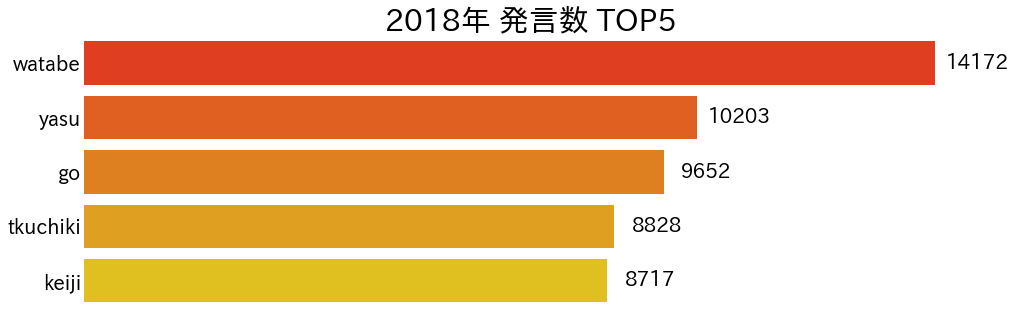

In [30]:
s = df['username'].value_counts()[:5]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'index': 'name'})
ax = sns.barplot(x='value', y='name', palette="autumn", data=tmp_df)
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2018年 発言数 TOP5', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

# @された数

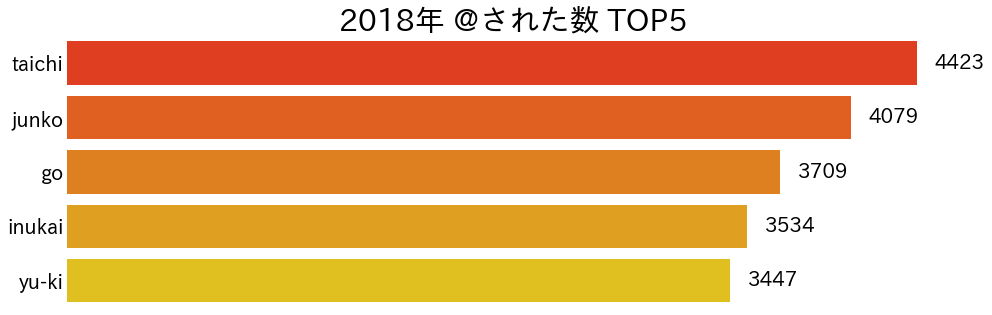

In [31]:
s = df['at_username'].value_counts()[:5]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'index': 'name'})
ax = sns.barplot(x='value', y='name', data=tmp_df, palette="autumn")
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2018年 @された数 TOP5', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

In [120]:
s_username = df.groupby('username').size().to_frame('発言数')
s_atusername = df.groupby('at_username').size().to_frame('@回数')
dfuser = pd.concat([s_username, s_atusername], axis=1, sort=True)
dfuser = dfuser.query('発言数 > 0')

Text(0.5,1.02,'発言数と@された回数の関係')

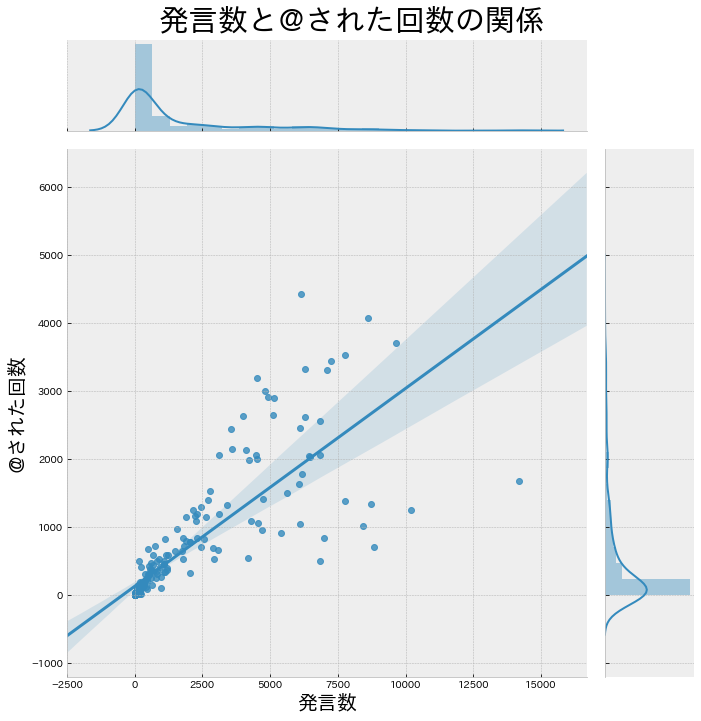

In [128]:
p = sns.jointplot(x='発言数', y='@回数', data=dfuser, kind="reg")
p.fig.set_figwidth(10)
p.fig.set_figheight(10)
p.set_axis_labels('発言数', '@された回数', fontsize=20)
p.fig.suptitle('発言数と@された回数の関係', fontsize=30, y=1.02)

# 一番リアクションがあった発言は？

In [13]:
def count_reaction(reactions):
    if len(reactions) == 0:
        return 0
    n_reactions = 0
    for reaction in reactions:
        n_reactions += len(reaction['users'])
    return n_reactions

In [14]:
df['n_reaction'] = df['reactions'].fillna('').apply(count_reaction)

# 一番使われたリアクションは？

In [32]:
from collections import defaultdict

In [33]:
count_reaction = defaultdict(int)
for reactions in tqdm_notebook(df['reactions'].fillna('')):
#     reactions = row['reactions']
    if len(reactions) == 0:
        continue
    for reaction in reactions:
        name = reaction['name']
        count = len(reaction['users'])
        count_reaction[name] += count

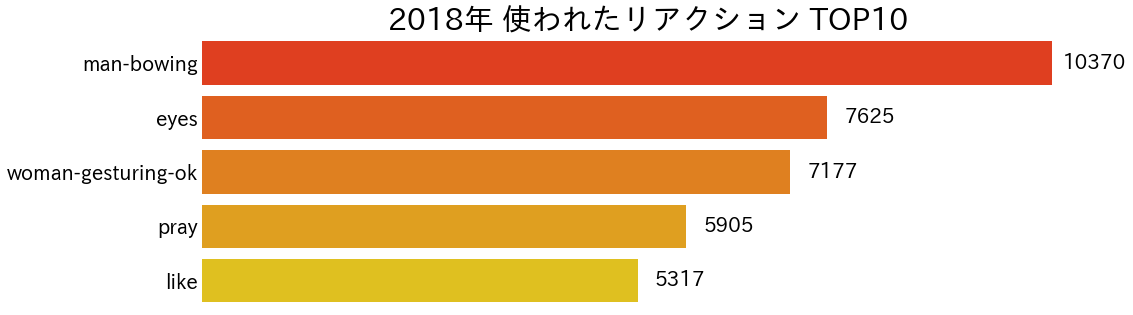

In [34]:
s = pd.Series(count_reaction).sort_values(ascending=False)[:5]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'index': 'name'})
ax = sns.barplot(x='value', y='name', data=tmp_df, palette="autumn")
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2018年 使われたリアクション TOP10', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

# 時系列で見た発言数

In [18]:
is_weekday_date =[dt for dt in pd.date_range('2018-1-1', '2018-12-16', freq='1D') if dt.weekday() in [0, 1, 2, 3, 4] and not jpholiday.is_holiday(dt.date())]

Text(0,0.5,'')

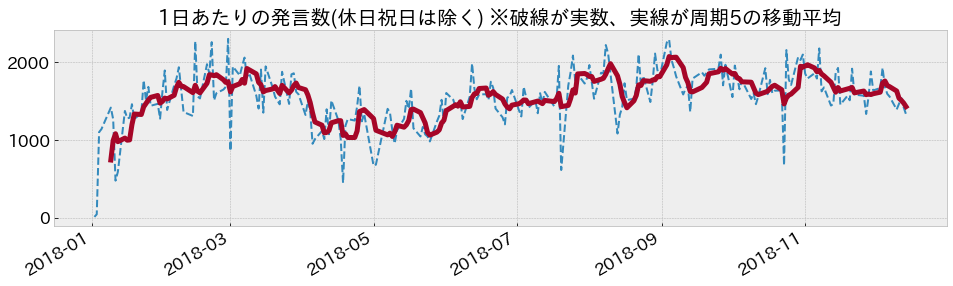

In [19]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax = df.groupby(pd.Grouper(key='dt', freq='1D')).size()[is_weekday_date].plot(linewidth=2, linestyle='--', ax=ax)
ax = df.groupby(pd.Grouper(key='dt', freq='1D')).size()[is_weekday_date].rolling(window=5).mean().plot(linewidth=5, ax=ax)
ax.set_title('1日あたりの発言数(休日祝日は除く) ※破線が実数、実線が周期5の移動平均', fontsize=20)
ax.tick_params(axis='both', labelsize='xx-large')
ax.set_xlabel('')
ax.set_ylabel('')

# Channel数

In [262]:
df_channel['created_dt'] = pd.to_datetime(df_channel['created'], unit='s')

In [292]:
s_added = df_channel.groupby(pd.Grouper(key='created_dt', freq='1W')).size()
s_archived = dfall.query('subtype == "channel_archive"').groupby(pd.Grouper(key='datetime', freq='1W')).size()

# transactionデータ作成

In [412]:
df_transition_channel = pd.concat([s_added, s_archived], axis=1).rename(columns={0: 'added', 1: 'archived'})
df_transition_channel.fillna(0, inplace=True)
df_transition_channel['count_channel'] = (df_transition_channel['added'] - df_transition_channel['archived']).cumsum()

In [413]:
df_transition_channel[one_year_ago < df_transition_channel.index]['added'].sum(), df_transition_channel[one_year_ago < df_transition_channel.index]['archived'].sum()

(352, 56.0)

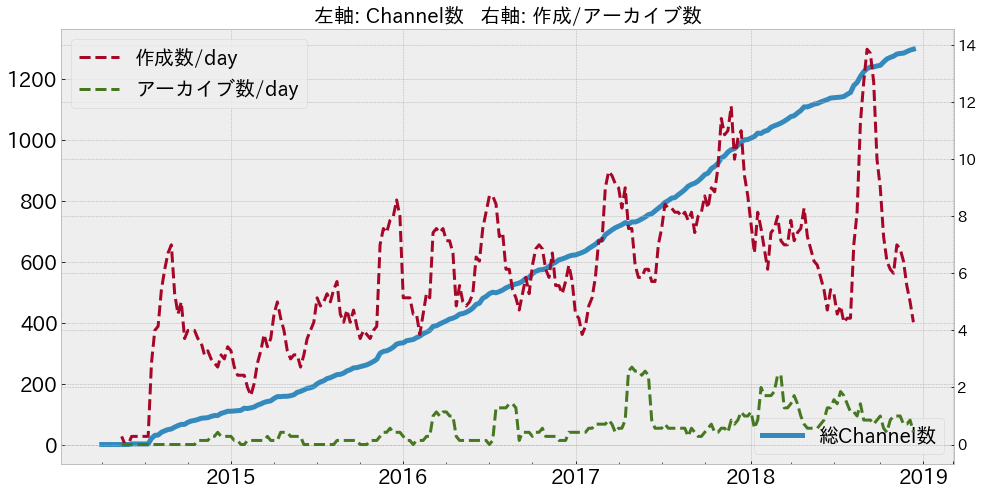

In [421]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
s = df_transition_channel['count_channel']
ax = s.plot(linewidth=5, linestyle='-', ax=ax, label='総Channel数')
ax.set_title('左軸: Channel数   右軸: 作成/アーカイブ数', fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
plt.legend(fontsize=20, loc='lower right')

ax2 = ax.twinx()
s = df_transition_channel['added'].rolling(window=7).mean()
s.plot(linewidth=3, linestyle='--', ax=ax2, label='作成数/day', color='C1')
s = df_transition_channel['archived'].rolling(window=7).mean()
s.plot(linewidth=3, linestyle='--', ax=ax2, label='アーカイブ数/day', color='C3')
ax2.tick_params(axis='both', labelsize=15)
plt.legend(fontsize=20)

# 時系列細かく

In [448]:
weekday_str_map = {
    0: '月', 1: '火', 2: '水', 3: '木', 4: '金', 5: '土', 6: '日'
}

In [512]:
df_daily = df.groupby(pd.Grouper(key='dt', freq='1D')).size()[is_weekday_date].to_frame('count')

In [520]:
df_daily['weekday'] = df_daily.index.weekday.map(weekday_str_map)
df_daily['day_in_month'] = df_daily.index.day

Text(0,0.5,'')

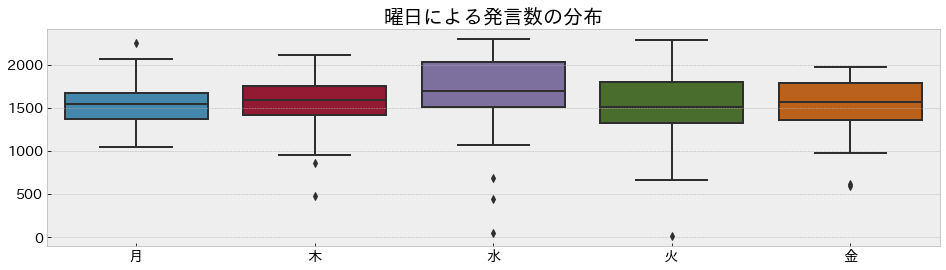

In [462]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax = sns.boxplot(data=df_daily.sort_values('weekday'), x='weekday', y='count')
ax.set_title('曜日による発言数の分布', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0,0.5,'')

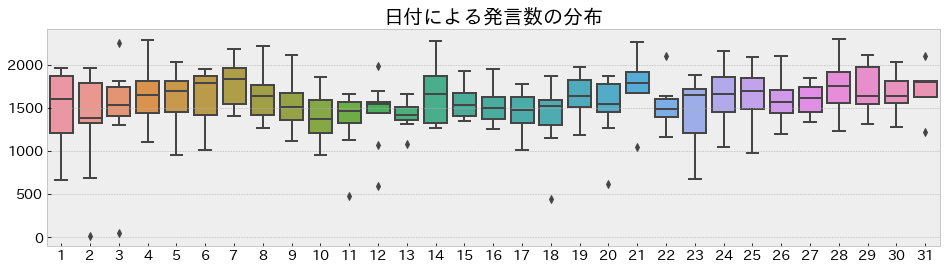

In [521]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax = sns.boxplot(data=df_daily.sort_values('day_in_month'), x='day_in_month', y='count')
ax.set_title('日付による発言数の分布', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')

In [502]:
is_weekday = df['dt'].dt.weekday.isin([0, 1, 2, 3, 4]) & ~df['dt'].dt.date.apply(jpholiday.is_holiday)

Text(0,0.5,'')

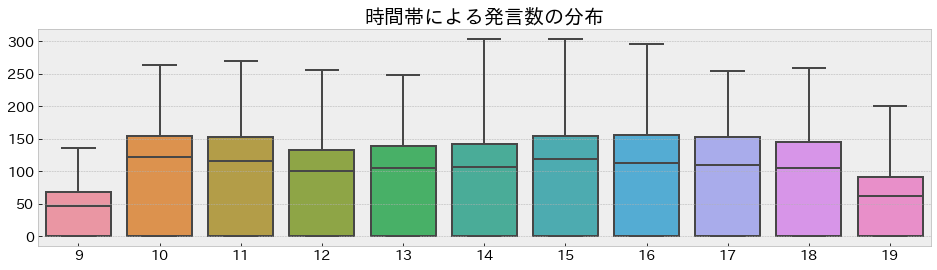

In [507]:
df_hourly = df[is_weekday].groupby(pd.Grouper(key='dt', freq='1h')).size().to_frame('count')
df_hourly['hour'] = df_hourly.index.hour + 9
work_hours = list(range(9, 20))

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax = sns.boxplot(data=df_hourly.query('hour in @work_hours').sort_values('hour'), x='hour', y='count')
ax.set_title('時間帯による発言数の分布', fontsize=20)
ax.tick_params(axis='both', labelsize='x-large')
ax.set_xlabel('')
ax.set_ylabel('')

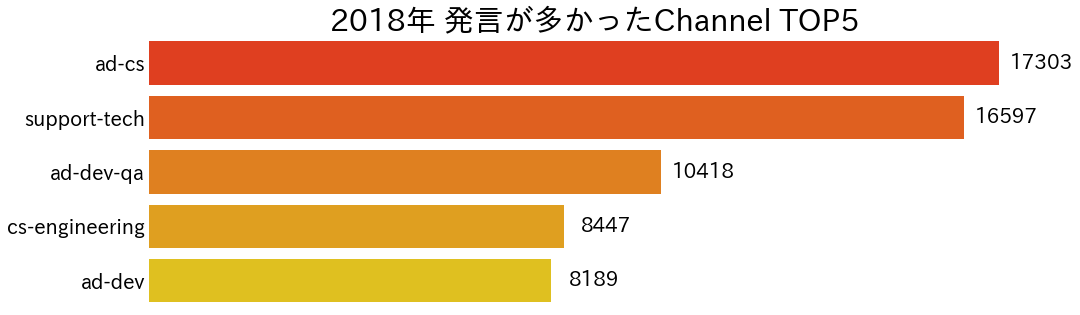

In [38]:
s = df.groupby('channel_name').size().sort_values(ascending=False)[:5]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'channel_name': 'name'})
ax = sns.barplot(x='value', y='name', data=tmp_df, palette="autumn")
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2018年 発言が多かったChannel TOP5', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/series.py:850: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Text(0,0.5,'')

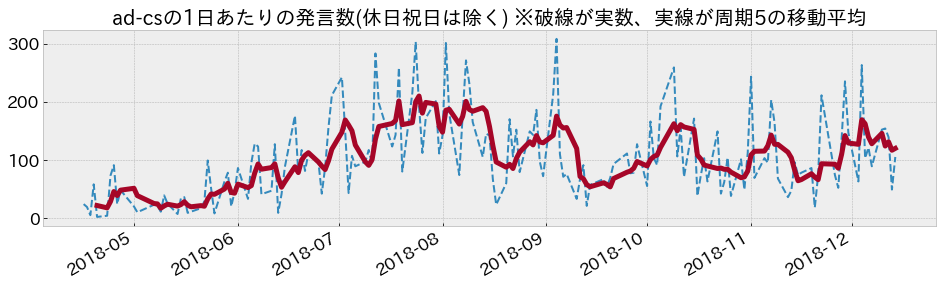

In [66]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax = df.query('channel_name == "ad-cs"').groupby(pd.Grouper(key='dt', freq='1D')).size()[is_weekday_date].plot(linewidth=2, linestyle='--', ax=ax)
ax = df.query('channel_name == "ad-cs"').groupby(pd.Grouper(key='dt', freq='1D')).size()[is_weekday_date].rolling(window=5).mean().plot(linewidth=5, ax=ax)
ax.set_title('ad-csの1日あたりの発言数(休日祝日は除く) ※破線が実数、実線が周期5の移動平均', fontsize=20)
ax.tick_params(axis='both', labelsize='xx-large')
ax.set_xlabel('')
ax.set_ylabel('')

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/series.py:850: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Text(0,0.5,'')

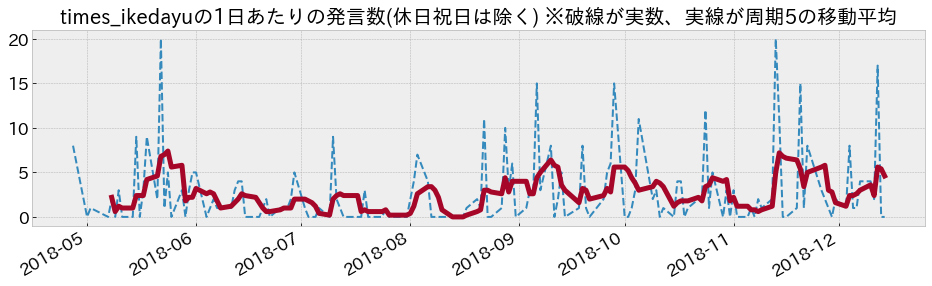

In [68]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax = df.query('channel_name == "times_ikedayu"').groupby(pd.Grouper(key='dt', freq='1D')).size()[is_weekday_date].plot(linewidth=2, linestyle='--', ax=ax)
ax = df.query('channel_name == "times_ikedayu"').groupby(pd.Grouper(key='dt', freq='1D')).size()[is_weekday_date].rolling(window=5).mean().plot(linewidth=5, ax=ax)
ax.set_title('times_ikedayuの1日あたりの発言数(休日祝日は除く) ※破線が実数、実線が周期5の移動平均', fontsize=20)
ax.tick_params(axis='both', labelsize='xx-large')
ax.set_xlabel('')
ax.set_ylabel('')

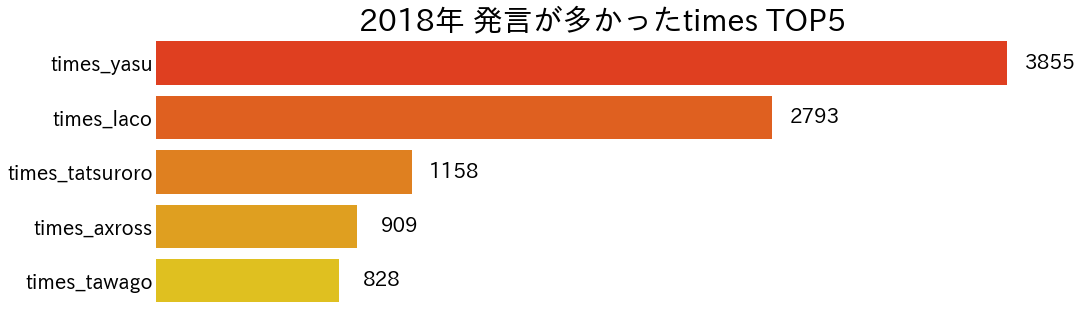

In [40]:
s = df[df['channel_name'].str.contains('times_')].groupby('channel_name').size().sort_values(ascending=False)[:5]

n = s.shape[0]
fig = plt.figure(figsize=(16,1*n))

tmp_df = s.to_frame('value').reset_index().rename(columns={'channel_name': 'name'})
ax = sns.barplot(x='value', y='name', data=tmp_df, palette="autumn")
max_ = tmp_df['value'].max()

for i, (_, row) in enumerate(tmp_df.iterrows()):
    text = ax.text(row['value'] + max_*.05, i+0.1, row['value'], color='black', ha="center", fontsize=20)

[spine.set_visible(False) for spine in ax.spines.values()]
ax.tick_params(bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('2018年 発言が多かったtimes TOP5', fontsize=30)
ax.patch.set_facecolor('white') 

ax.patch.set_alpha(0)
plt.grid(False)

In [50]:
def plot_hist(s, title, bins=30, xlabel='', ylabel=''):
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(1, 1, 1)

    mean =s.mean().round(2)
    median = s.median().round(2)
    std = s.std().round(2)

    sns.distplot(s, ax=ax, bins=bins, kde_kws={"color": "k", "lw": 3})
    ax.set_title(title, fontsize=20)
    ax.tick_params(axis = 'x', which = 'major', labelsize = 20)
    vals = ax.get_yticks()
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
    ax.text( 0.99, 0.99, f"平均値: {mean:.2f} \n 中央値: {median:.2f} \n 標準偏差: {std:.2f}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=20)

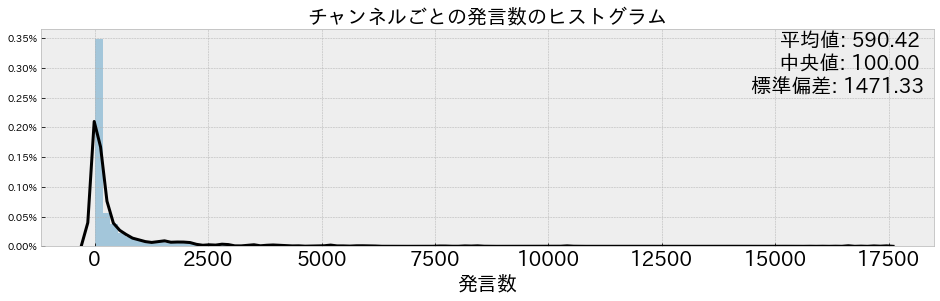

In [51]:
s = df.groupby('channel_name').size().sort_values(ascending=False)
s = s[s > 0]
plot_hist(s, 'チャンネルごとの発言数のヒストグラム', bins=100, xlabel='発言数')

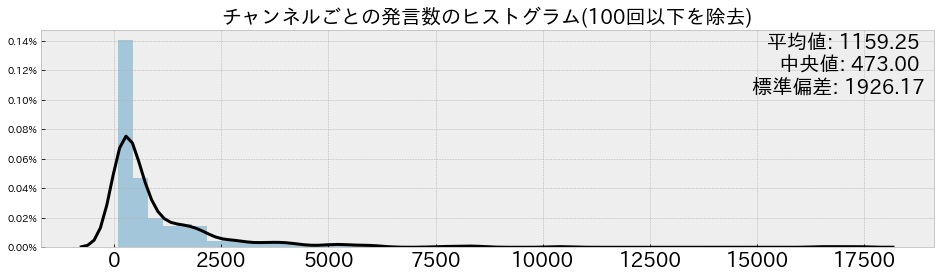

In [428]:
s = df.groupby('channel_name').size().sort_values(ascending=False)
s = s[s > 100]
plot_hist(s, 'チャンネルごとの発言数のヒストグラム(100回以下を除去)', bins=50)

In [42]:
s = df.groupby('channel_name').size().sort_values(ascending=False)

In [43]:
sum_ = s.sum()
tmp_df = pd.concat([s, s.cumsum(), 100*s.cumsum()/sum_], axis=1)
tmp_df.columns = ['number', 'cumsum', 'cumsum_percent']

Text(0.5,1,'Slcak Channelと発言数のパレート図')

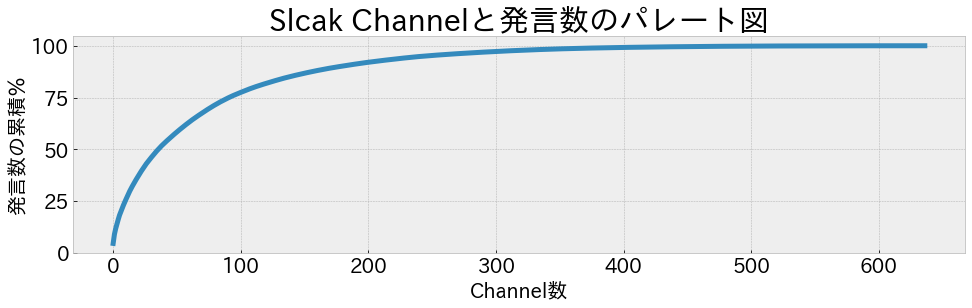

In [44]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)

n = tmp_df.shape[0]
x = np.arange(0, n)
ax.plot(x, tmp_df['cumsum_percent'], linewidth=5)
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('Channel数', fontsize=20)
ax.set_ylabel('発言数の累積％', fontsize=20)
ax.set_title('Slcak Channelと発言数のパレート図', fontsize=30)

# 自然言語処理

In [13]:
df['text_trimed'] = df['text'].str.replace(r'<\S+>', '').str.replace(r':\S+:', '').str.replace('\n', '')

In [14]:
import MeCab

In [15]:
from sklearn.manifold import TSNE

# Doc2Vec

In [16]:
from gensim import models
from gensim.models.doc2vec import TaggedDocument

INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


In [18]:
tmp_df = df.groupby('channel_name').size().sort_values(ascending=False)
top100_channel = tmp_df[:100].index.tolist()
top10_channel = tmp_df[:10].index.tolist()
top20_channel = tmp_df[:20].index.tolist()

In [573]:
grouped = df.query('channel_name in @top100_channel').groupby('channel_name')
channel_words = {}
for channel_name, tmp_df in tqdm_notebook(grouped):
    doc = ''.join(tmp_df['text_trimed'].values.tolist())
    channel_words[channel_name] = split_into_words(doc)

In [19]:
from wordcloud import WordCloud

In [29]:
def split_into_words(doc):
    mecab = MeCab.Tagger("-Ochasen -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
    lines = mecab.parse(doc).splitlines()
    words = []
    for line in tqdm_notebook(lines):
        chunks = line.split('\t')
        if len(chunks) > 3 and (chunks[3].startswith('動詞') or chunks[3].startswith('形容詞') or (chunks[3].startswith('名詞') and not chunks[3].startswith('名詞-数'))):
            words.append(chunks[0])
    return words

In [61]:
stop_words = [ 'てる', 'いる', 'なる', 'れる', 'する', 'ある', 'こと', 'これ', 'さん', 'して', \
         'くれる', 'やる', 'くださる', 'そう', 'せる', 'した',  '思う',  \
         'それ', 'ここ', 'ちゃん', 'くん', '', 'て','に','を','は','の', 'が', 'と', 'た', 'し', 'で', \
         'ない', 'も', 'な', 'い', 'か', 'ので', 'よう', '', '思い', 'なっ', 'でき', 'いい', 'もの', 'あり', 'なり', 'ところ',
        'こちら', '本日', 'おり', 'ください', 'お願い', 'いたし', 'ため', 'いただき', 'gt', 'commented', 'on', '思っ', '行っ', 
        'しまっ', 'やっ', '行き', 'とき', 'できる', '自分', '書い', 'あと'
    ]

Text(0.5,1,'#general')

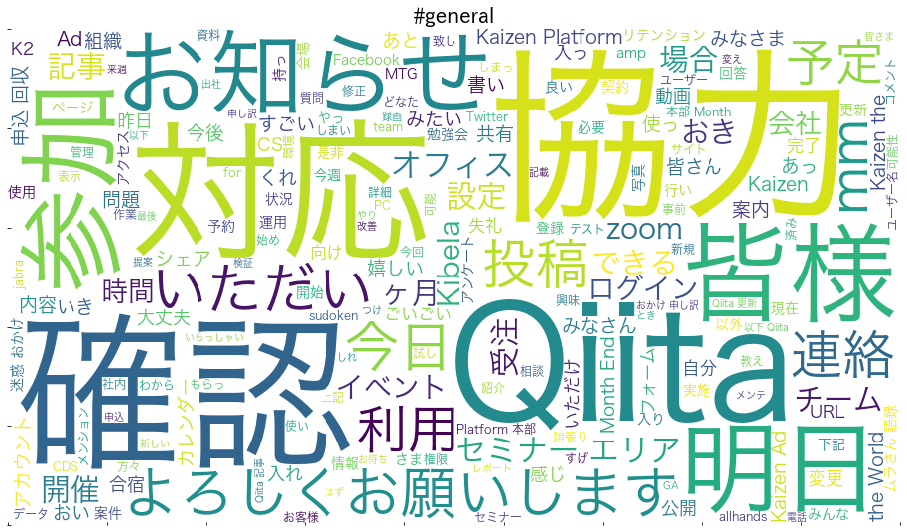

In [43]:
channel_name = 'general'

tmp_df = df.query(f'channel_name == "{channel_name}"')    
tmp_doc = ''.join(tmp_df['text_trimed'].values.tolist())
tmp_words = split_into_words(tmp_doc)

fig = plt.figure(figsize=(16, 10))
fpath = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"

wordcloud = WordCloud(background_color="white", width=900, height=500, font_path=fpath, stopwords=stop_words).generate(" ".join(tmp_words))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(wordcloud)
[spine.set_visible(False) for spine in ax.spines.values()]

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
ax.set_title(f'#{channel_name}', fontsize=20)

Text(0.5,1,'#random')

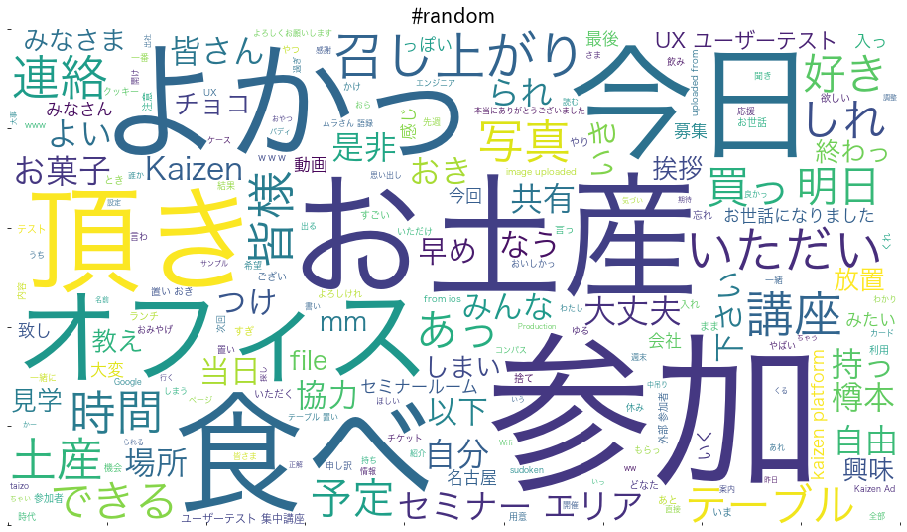

In [56]:
channel_name = 'random'

tmp_df = df.query(f'channel_name == "{channel_name}"')    
tmp_doc = ''.join(tmp_df['text_trimed'].values.tolist())
tmp_words = split_into_words(tmp_doc)

fig = plt.figure(figsize=(16, 10))
fpath = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"

wordcloud = WordCloud(background_color="white", width=900, height=500, font_path=fpath, stopwords=stop_words).generate(" ".join(tmp_words))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(wordcloud)
[spine.set_visible(False) for spine in ax.spines.values()]

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
ax.set_title(f'#{channel_name}', fontsize=20)

Text(0.5,1,'#times_ikedayu')

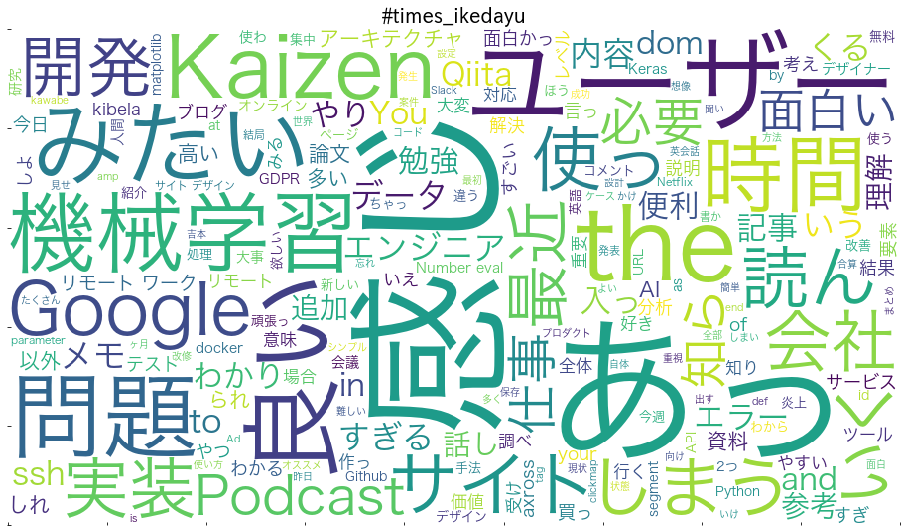

In [62]:
channel_name = 'times_ikedayu'

tmp_df = df.query(f'channel_name == "{channel_name}"')    
tmp_doc = ''.join(tmp_df['text_trimed'].values.tolist())
tmp_words = split_into_words(tmp_doc)

fig = plt.figure(figsize=(16, 10))
fpath = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"

wordcloud = WordCloud(background_color="white", width=900, height=500, font_path=fpath, stopwords=stop_words).generate(" ".join(tmp_words))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(wordcloud)
[spine.set_visible(False) for spine in ax.spines.values()]

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
ax.set_title(f'#{channel_name}', fontsize=20)

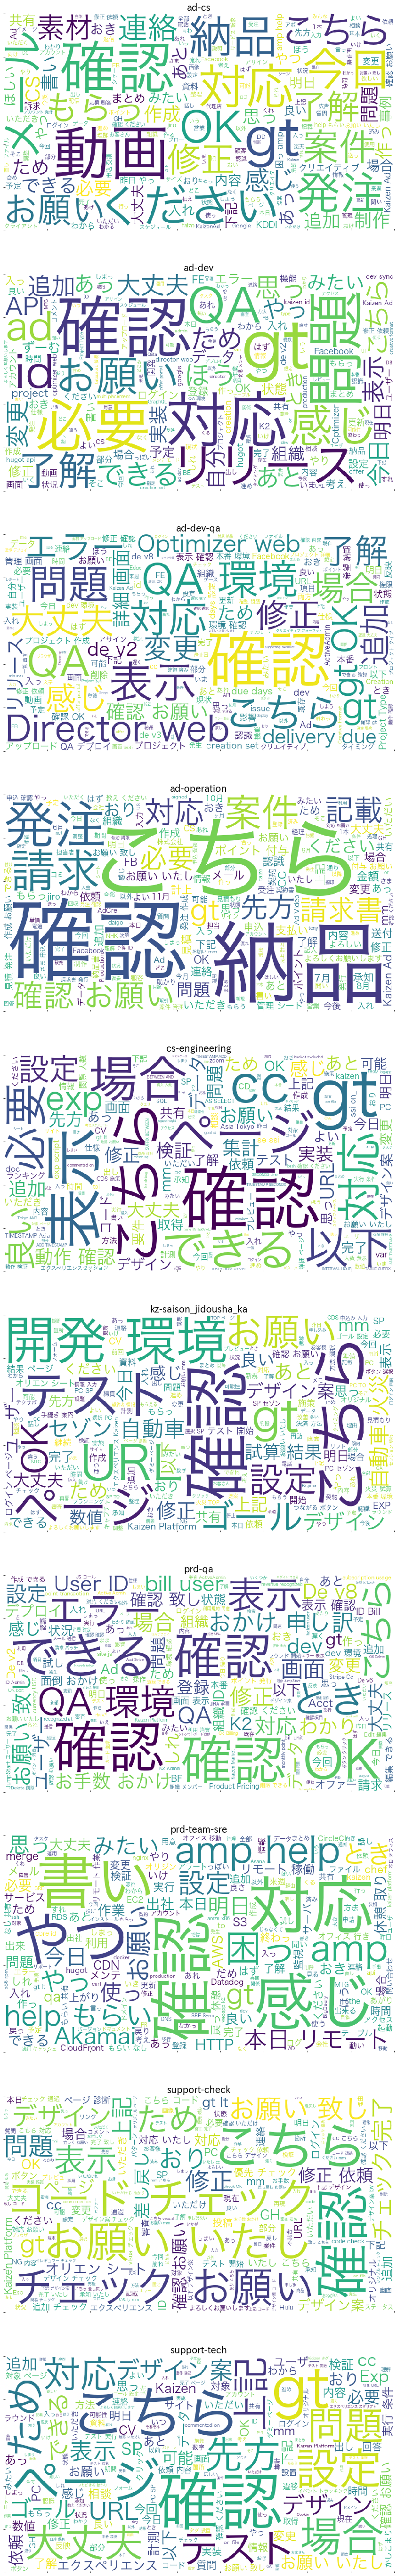

In [661]:
n_plot = 10
fig = plt.figure(figsize=(16, 10*n_plot))
fpath = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"

count = 1
for channel_name, words in channel_words.items():
    if channel_name not in top10_channel:
        continue
    wordcloud = WordCloud(background_color="white", width=900, height=500, font_path=fpath, stopwords=stop_words).generate(" ".join(words))
    ax = fig.add_subplot(n_plot, 1, count)
    ax.imshow(wordcloud)
    [spine.set_visible(False) for spine in ax.spines.values()]

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
    ax.set_title(channel_name, fontsize=20)
    
    if count == n_plot:
        break
    count += 1

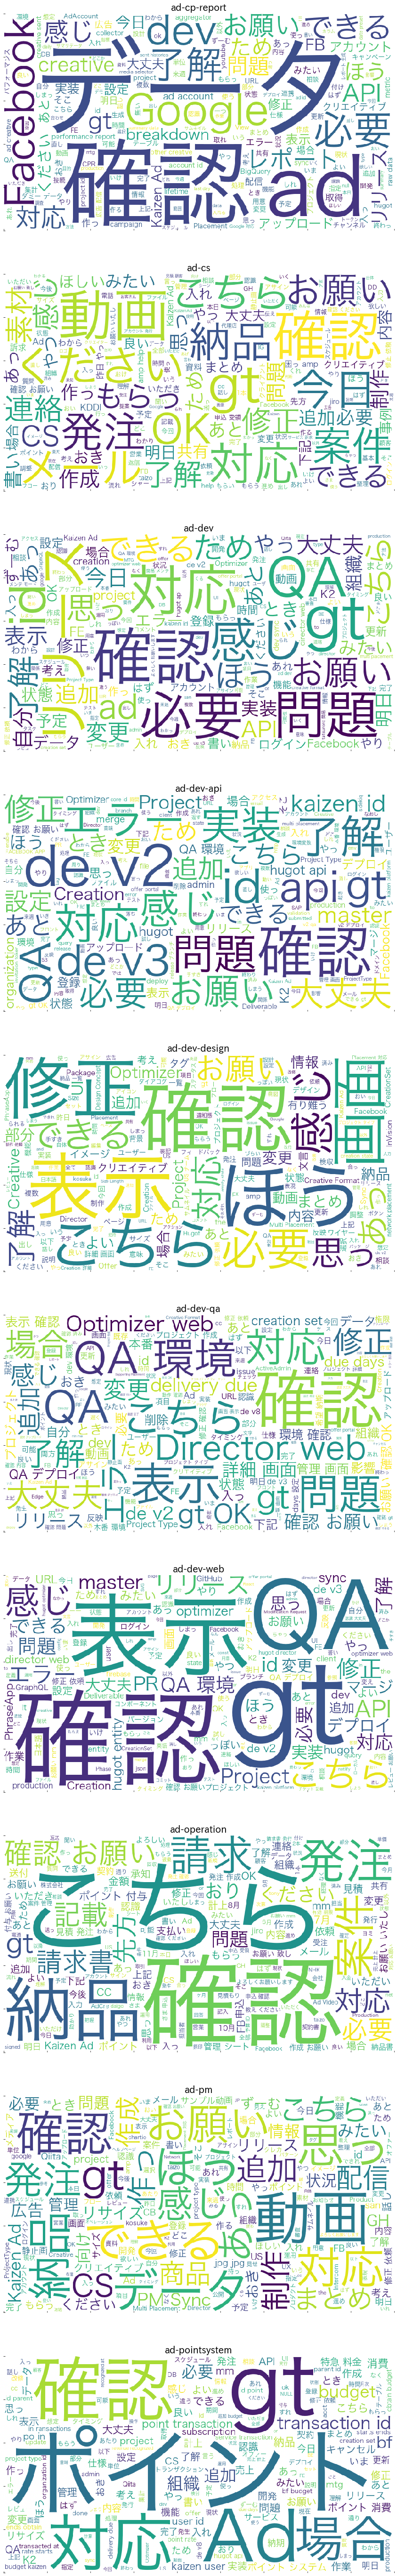

In [603]:
n_plot = 10
fig = plt.figure(figsize=(16, 10*n_plot))
fpath = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"

count = 1
for channel_name, words in channel_words.items():
    wordcloud = WordCloud(background_color="white", width=900, height=500, font_path=fpath, stopwords=stop_words).generate(" ".join(words))
    ax = fig.add_subplot(n_plot, 1, count)
    ax.imshow(wordcloud)
    [spine.set_visible(False) for spine in ax.spines.values()]

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
    ax.set_title(channel_name, fontsize=20)
    
    if count == n_plot:
        break
    count += 1

In [687]:
sentences = []
for channel_name, words in channel_words.items():
    td = TaggedDocument(words=words, tags=[channel_name])
    sentences.append(td)

In [690]:
model = models.Doc2Vec(sentences, dm=0, vector_size=300, window=15, alpha=.025, min_alpha=.025, min_count=1, sample=1e-6)

print('\n訓練開始')
for epoch in range(20):
    print('Epoch: {}'.format(epoch + 1))
    model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)
    model.alpha -= (0.025 - 0.0001) / 19
    model.min_alpha = model.alpha

INFO:gensim.models.doc2vec:collecting all words and their counts
INFO:gensim.models.doc2vec:PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO:gensim.models.doc2vec:collected 67614 word types and 100 unique tags from a corpus of 100 examples and 3566173 words
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=1 retains 67614 unique words (100% of original 67614, drops 0)
INFO:gensim.models.word2vec:effective_min_count=1 leaves 3566173 word corpus (100% of original 3566173, drops 0)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 67614 items
INFO:gensim.models.word2vec:sample=1e-06 downsamples 14773 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 436963 word corpus (12.3% of prior 3566173)
INFO:gensim.models.base_any2vec:estimated required memory for 67614 words and 300 dimensions: 196220600 bytes
INFO:gensim.models.word2vec:resetting layer weights
INFO:gensim.model


訓練開始
Epoch: 1


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399494 effective words) took 1.0s, 401050 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399991 effective words) took 0.9s, 446775 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 2


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 93.00% examples, 361448 words/s, in_qsize 5, out_qsize 2
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399582 effective words) took 1.0s, 382667 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399254 effective words) took 1.0s, 415485 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 m

Epoch: 3


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399401 effective words) took 0.9s, 466542 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399319 effective words) took 0.9s, 463930 effective words/s
INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 81.00% examples, 311747 words/s, in_qsize 5, out_qsize 0
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 m

Epoch: 4


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 97.00% examples, 384522 words/s, in_qsize 3, out_qsize 0
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399851 effective words) took 1.0s, 384208 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (398808 effective words) took 0.9s, 448304 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 m

Epoch: 5


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399316 effective words) took 0.8s, 483168 effective words/s
INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 93.00% examples, 352766 words/s, in_qsize 3, out_qsize 2
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399225 effective words) took 1.1s, 366813 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 m

Epoch: 6


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399664 effective words) took 1.0s, 419645 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (400068 effective words) took 0.9s, 424787 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 7


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (400008 effective words) took 0.9s, 436036 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (398897 effective words) took 0.9s, 432321 effective words/s
INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 96.00% examples, 371054 words/s, in_qsize 3, out_qsize 1
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 m

Epoch: 8


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399417 effective words) took 1.0s, 417182 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (398975 effective words) took 0.9s, 445254 effective words/s
INFO:gensim.models.base_any2vec:EPOCH 3 - PROGRESS: at 98.00% examples, 379505 words/s, in_qsize 2, out_qsize 1
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 m

Epoch: 9


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399218 effective words) took 0.8s, 488129 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399909 effective words) took 0.9s, 454571 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 10


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399064 effective words) took 0.8s, 492349 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (398945 effective words) took 0.8s, 513402 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 11


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (400370 effective words) took 0.9s, 434649 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399334 effective words) took 0.8s, 490952 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 12


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399905 effective words) took 0.9s, 450461 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399160 effective words) took 0.9s, 430883 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 13


INFO:gensim.models.base_any2vec:EPOCH 1 - PROGRESS: at 86.00% examples, 331986 words/s, in_qsize 5, out_qsize 1
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (398830 effective words) took 1.1s, 350897 effective words/s
INFO:gensim.models.base_any2vec:EPOCH 2 - PROGRESS: at 88.00% examples, 336590 words/s, in_qsize 6, out_qsize 1
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399919 effective words) to

Epoch: 14


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399622 effective words) took 0.8s, 502153 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399496 effective words) took 0.8s, 502948 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 15


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399697 effective words) took 0.8s, 483968 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399200 effective words) took 0.8s, 488220 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 16


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399808 effective words) took 0.9s, 454824 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399641 effective words) took 0.8s, 470762 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 17


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399270 effective words) took 0.9s, 433395 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399184 effective words) took 0.9s, 451752 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 18


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (400446 effective words) took 0.9s, 466909 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399736 effective words) took 0.9s, 466777 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 19


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399403 effective words) took 0.9s, 454082 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (399884 effective words) took 0.9s, 452077 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

Epoch: 20


INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 1 : training on 3566173 raw words (399142 effective words) took 0.8s, 511091 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.base_any2vec:EPOCH - 2 : training on 3566173 raw words (398916 effective words) took 0.9s, 451573 effective words/s
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.base_any2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensi

In [692]:
model.save(str(data_dir/'kaizen_slack/d2v.model'))

INFO:gensim.utils:saving Doc2Vec object under /Users/yutaro_ikeda/.ghq/github.com/ikedaosushi/python-sandbox/data/kaizen_slack/d2v.model, separately None
INFO:gensim.utils:storing np array 'syn1neg' to /Users/yutaro_ikeda/.ghq/github.com/ikedaosushi/python-sandbox/data/kaizen_slack/d2v.model.trainables.syn1neg.npy
INFO:gensim.utils:storing np array 'vectors' to /Users/yutaro_ikeda/.ghq/github.com/ikedaosushi/python-sandbox/data/kaizen_slack/d2v.model.wv.vectors.npy
INFO:gensim.utils:saved /Users/yutaro_ikeda/.ghq/github.com/ikedaosushi/python-sandbox/data/kaizen_slack/d2v.model


In [63]:
model = models.Doc2Vec.load(str(data_dir/'kaizen_slack/d2v.model'))

INFO:gensim.utils:loading Doc2Vec object from /Users/yutaro_ikeda/.ghq/github.com/ikedaosushi/python-sandbox/data/kaizen_slack/d2v.model
INFO:gensim.utils:loading vocabulary recursively from /Users/yutaro_ikeda/.ghq/github.com/ikedaosushi/python-sandbox/data/kaizen_slack/d2v.model.vocabulary.* with mmap=None
INFO:gensim.utils:loading trainables recursively from /Users/yutaro_ikeda/.ghq/github.com/ikedaosushi/python-sandbox/data/kaizen_slack/d2v.model.trainables.* with mmap=None
INFO:gensim.utils:loading syn1neg from /Users/yutaro_ikeda/.ghq/github.com/ikedaosushi/python-sandbox/data/kaizen_slack/d2v.model.trainables.syn1neg.npy with mmap=None
INFO:gensim.utils:loading wv recursively from /Users/yutaro_ikeda/.ghq/github.com/ikedaosushi/python-sandbox/data/kaizen_slack/d2v.model.wv.* with mmap=None
INFO:gensim.utils:loading vectors from /Users/yutaro_ikeda/.ghq/github.com/ikedaosushi/python-sandbox/data/kaizen_slack/d2v.model.wv.vectors.npy with mmap=None
INFO:gensim.utils:loading docvec

In [67]:
ls_similar_doc = []
for channel_name in top20_channel:
    similar_doc = {'channel_name': channel_name}
    similar_channels = model.docvecs.most_similar(channel_name, topn=3)
    for i, (cname, value) in enumerate(similar_channels):
        text = f"{cname}({value:.2f})"
        similar_doc[f'{i+1}位'] = text
    ls_similar_doc.append(similar_doc)

INFO:gensim.models.keyedvectors:precomputing L2-norms of doc weight vectors
/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [68]:
df_sim = pd.DataFrame(ls_similar_doc)[['channel_name', '1位', '2位', '3位']]

In [69]:
df_sim[df_sim['channel_name'].str.contains('times_')].to_clipboard(sep=';')

In [70]:
from sklearn.manifold import TSNE

In [90]:
target_channels = [c for c in top20_channel if 'kz-' not in c]
X = np.stack([model.docvecs[cname] for cname in target_channels])
X_embedded = TSNE(n_components=2, n_iter=100000, learning_rate=4).fit_transform(X)

In [97]:
target_channels

['ad-cs',
 'support-tech',
 'ad-dev-qa',
 'cs-engineering',
 'ad-dev',
 'ad-operation',
 'prd-team-sre',
 'prd-qa',
 'support-check',
 'prd-team-qa',
 'prd-dev',
 'sre-yorozu',
 'prd-random',
 'ad-dev-api',
 'kaizen_ccf']

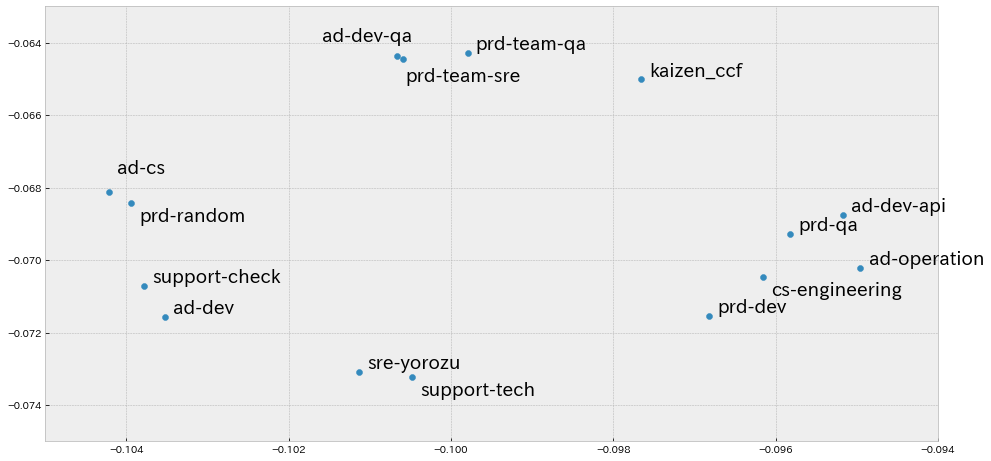

In [109]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(X_embedded.T[0], X_embedded.T[1])
ax.set_xlim(-0.105, -0.094)
ax.set_ylim(-0.075, -0.063)
fontsize=19

for i, c_name in enumerate(target_channels):
    if c_name == 'ad-cs':
        ax.annotate(c_name, (X_embedded[i][0]+0.0001, X_embedded[i][1]+0.0005), fontsize=fontsize)
    elif c_name =='support-tech':
        ax.annotate(c_name, (X_embedded[i][0]+0.0001, X_embedded[i][1]-0.0005), fontsize=fontsize)
    elif c_name =='cs-engineering':
        ax.annotate(c_name, (X_embedded[i][0]+0.0001, X_embedded[i][1]-0.0005), fontsize=fontsize)
    elif c_name =='prd-random':
        ax.annotate(c_name, (X_embedded[i][0]+0.0001, X_embedded[i][1]-0.0005), fontsize=fontsize)
    elif c_name =='ad-dev-qa':
        ax.annotate(c_name, (X_embedded[i][0]-0.001, X_embedded[i][1]+0.0005), fontsize=fontsize)
    elif c_name =='prd-team-sre':
        ax.annotate(c_name, (X_embedded[i][0]+0.0001, X_embedded[i][1]-0.0007), fontsize=fontsize)
    else:
        ax.annotate(c_name, (X_embedded[i][0]+0.0001, X_embedded[i][1]+0.0001), fontsize=fontsize)